# DS 453 / 653: Programming Assignment 9

**Due date**: Thursday, April 18 at 8pm on [Gradescope](https://www.gradescope.com/courses/710247).

_You must follow the Academic Code of Conduct and Collaboration Policy stated in the course syllabus at all times while working on this assignment._

This assignment contains 2 questions. *Both the first part and the second part will be manually graded*. You must successfully complete both parts in order to pass this assignment.

## Assignment Overview

The goal of this assignment is to construct zero knowledge proofs. Rather than building ZK from scratch like we did with MPC, this time we are going to use existing compilers that will convert from a high-level normal-looking language into all of the low-level additions and multiplications. We will explore ZK proofs for games like Sudoku and Battleship.

## Task 1: Running a ZK proof for Sudoku

Recall that [Sudoku](https://en.wikipedia.org/wiki/Sudoku) is a game played with a $9 \times 9$ grid of numbers. A solution to the puzzle must include one number per cell, such that each row, column, and $3 \times 3$ grid contains each of the numbers 1 through 9 exactly once.

### Background

In class, Prof. Kaptchuk did a live demonstration where he proved that he knew how to solve the following Sudoku puzzle:

In [1]:
[[7,0,0,0,4,0,0,0,2],
[0,0,5,0,0,0,1,0,0],
[0,2,0,9,0,1,0,4,0],
[0,0,7,0,0,0,5,0,0],
[5,0,0,0,2,0,0,0,7],
[0,0,6,0,0,0,9,0,0],
[0,5,0,8,0,6,0,3,0],
[0,0,3,0,0,0,8,0,0],
[1,0,0,0,3,0,0,0,9]]

[[7, 0, 0, 0, 4, 0, 0, 0, 2],
 [0, 0, 5, 0, 0, 0, 1, 0, 0],
 [0, 2, 0, 9, 0, 1, 0, 4, 0],
 [0, 0, 7, 0, 0, 0, 5, 0, 0],
 [5, 0, 0, 0, 2, 0, 0, 0, 7],
 [0, 0, 6, 0, 0, 0, 9, 0, 0],
 [0, 5, 0, 8, 0, 6, 0, 3, 0],
 [0, 0, 3, 0, 0, 0, 8, 0, 0],
 [1, 0, 0, 0, 3, 0, 0, 0, 9]]

The "puzzle" is a partial board, where some of the cells contain numbers in the range 1-9 and some of the cells are currently blank (represented by a "0" above).

Although you never saw it in the in-class demonstration, Prof. Kaptchuk secretly placed all of the cards facedown based on the following solution to the Sudoku puzzle:

In [2]:
[[7,6,1,5,4,8,3,9,2],
[4,9,5,3,6,2,1,7,8],
[3,2,8,9,7,1,6,4,5],
[2,3,7,4,8,9,5,1,6],
[5,1,9,6,2,3,4,8,7],
[8,4,6,1,5,7,9,2,3],
[9,5,2,8,1,6,7,3,4],
[6,7,3,2,9,4,8,5,1],
[1,8,4,7,3,5,2,6,9]]

[[7, 6, 1, 5, 4, 8, 3, 9, 2],
 [4, 9, 5, 3, 6, 2, 1, 7, 8],
 [3, 2, 8, 9, 7, 1, 6, 4, 5],
 [2, 3, 7, 4, 8, 9, 5, 1, 6],
 [5, 1, 9, 6, 2, 3, 4, 8, 7],
 [8, 4, 6, 1, 5, 7, 9, 2, 3],
 [9, 5, 2, 8, 1, 6, 7, 3, 4],
 [6, 7, 3, 2, 9, 4, 8, 5, 1],
 [1, 8, 4, 7, 3, 5, 2, 6, 9]]

You can inspect for yourself that this is a valid Sudoku board that satisfies all of the constraints:
- Each row, column, and $3\times 3$ grid contains the numbers 1-9 exactly once.
- The solution corresponds to the puzzle above. That is: the two arrays are equal for every non-zero cell in the original puzzle.

In class, Prof. Kaptchuk showed a _physical_ zero knowledge proof that he knew a solution to the Sudoku puzzle. This proof consisted of a prover algorithm (his method of placing the cards facedown and responding to your challenges) and a verifier algorithm (your decisions about how to challenge him, and how to check that he responds to the challenges correctly).

In this task, let's create a _digital_ zero knowledge proof that we can share over the Internet. Specifically, we will create a {__z__}ero {__k__}nowledge {__s__}uccinct {__n__}on-interactive {__ar__}gument of {__k__}nowledge, or __zk-SNARK__. That is, the proof that we construct will be

- _zero knowledge_: the verifier won't learn the solution to the Sudoku puzzle (although the verifier does know the puzzle itself)
- _succinct_: in other words, it will be short!
- _non-interactive_: the proof will contain just a single message that the prover sends to the verifier, rather than an interactive challenge-response protocol
- _argument of knowledge_: this means that the verifier will be convinced that the puzzle is solveable _and_ that the prover knows a solution (in class we called this a "proof of knowledge"; for the purposes of this course, you should think of the terms "proof" and "argument" as synonyms)

### Your objective

Visit the Snarky Sudoku website: https://snarky-sudoku.vercel.app/. This site will allow you to act as the prover and construct a proof that you know a Sudoku puzzle. Then you can verify that the proof is correct.

__Step 1: the prover.__ Click on the "solve" link. Enter the puzzle and solution grids from the in-class example. Click on the "generate proof" button to generate a proof using a zero knowledge proof system called Groth16 (it is named for the [paper](https://eprint.iacr.org/2016/260.pdf) that Jens Groth wrote in 2016).

Note that the resulting proof is very short: just three elliptic-curve group elements (in a group where the discrete log problem is hard). Also note that the proof is randomized; if you click on the "generate proof" button again, you will receive a different set of 3 points.

_Paste your proof in the box below._

__Your response:__

In [4]:
proof = 'ac49c2'

__Step 2: the verifier.__ Now go back to the main Snarky Sudoku site and click on the [Verify](https://snarky-sudoku.vercel.app/verify) link. In this step, you will take on the role of the verifier. Recall that the verifier already knows the Sudoku puzzle, but does not know its solution. Imagine that the prover somehow sent you the proof from the box above... perhaps the prover emailed you this proof, in order to convince you that they know the solution. Let's check to see if the proof is valid.

Paste in the Sudoku puzzle and the proof into this page. (Remember that the verifier does _not_ know the solution, which is why this page isn't asking for that.) Click on the "check proof" button to verify the claimed proof.

_Take a screenshot of the resulting page and insert it below._

__Your response:__

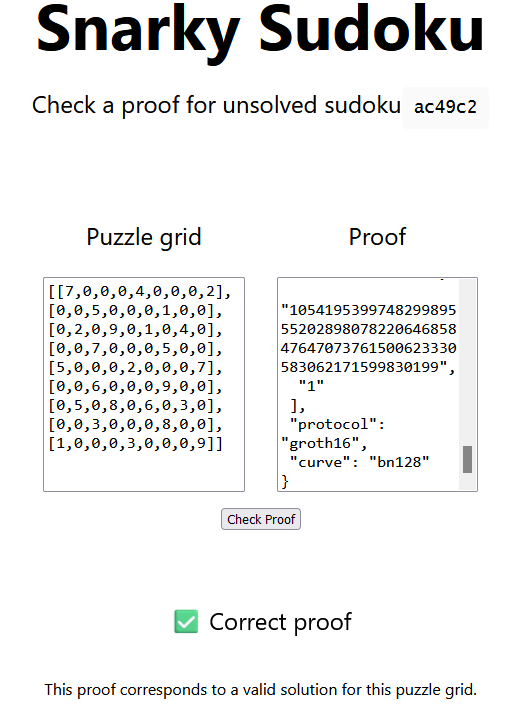

That's it! You have just created and verified your first zero knowledge proof.

These proofs can be combined with other techniques from this class. For instance, using this idea Alice can [create a smart contract](https://coingeek.com/the-first-successful-zero-knowledge-pay-to-sudoku-bounty-on-bitcoin/) that will pay the first person who solves a Sudoku puzzle. The smart contract ensures that the puzzle-solver Bob is paid for providing a solution, zero knowledge ensures that the solution is valid, and encryption protects the solution so that only Alice learns it (i.e., it remains hidden to the rest of the world, even though the transaction was done on a public blockchain).

## Task 2: Constructing a ZK proof

### Background

In this task, let's write the code to make a zero knowledge proof for a property of our choice. Specifically, let's use the function $g$ from Homework 6 (but without the UInt8 this time).

In [5]:
# x is an array of size 3

def g(x):
    return (x[0] * x[1] + x[2])

Suppose you want to prove that you know three inputs $a, b, c$ that cause the result $g([a, b, c])$ to equal the number $5$.

Admittedly this problem isn't difficult to solve... you can think about some possible solutions. But, suppose for now that the verifier doesn't know any solutions. The prover wants to convince the verifier that she has a solution, but without revealing it.

We are going to write this proof in a language called [Circom](https://docs.circom.io/). This is a programming language that is purpose-built for zero knowledge proofs; it will let us convert from a description of the statement $g$ into a Groth16 zero knowledge proof. The Circom language is very powerful; you can prove many kinds of statements in this language. For instance, the Sudoku website from Task 1 was written using Circom; you can check out its source code [at this link](https://github.com/nalinbhardwaj/snarky-sudoku/blob/main/circuits/sudoku.circom). As you might expect, it contains checks that the solution is consistent with the puzzle and obeys the Sudoku rules.

### Circom code

We provide the code below to create a Circom representation of $g$ together with a valid solution.


__Your response:__

In [ ]:
pragma circom 2.1.4;

include "circomlib/poseidon.circom";

template Example () {
    // three inputs for the function g
    signal input a;  // this input will later be declared public
    signal input b;  // two private inputs
    signal input c;

    // include a secret random value; its purpose will become clear later
    // (relying on the prover to generate this at random before running the proof)
    signal input randomness;

    // program has one public output, along with an assertion check below
    signal output h;

    var x[3]; // creating an array of size 3
    x[0] = a; // populating the array with the inputs
    x[1] = b;
    x[2] = c;
    signal g; // private variable, neither an input nor output
    
    g <-- (x[0] * x[1]) + x[2]; // calculate g
    assert(g == 5);             // verify that g equals 5
    
    component com = Poseidon(4);  // initialize a hash function with 4 inputs
    com.inputs[0] <-- a;          // take the hash of a, b, c
    com.inputs[1] <-- b;
    com.inputs[2] <-- c;          // note: use the syntax <-- to assign values
    com.inputs[3] <-- randomness; // to variables of type signal or component

    // this construction hash(data, randomness) yields a commitment scheme that is hiding + binding,
    // where the prover can later open (if desired) by revealing a, b, c, and randomness

    // run the Poseidon hash function, and output the result
    h <-- com.out;
}

// declare a to be public (this is optional; you could remove `public[a]` if desired)
component main { public [ a ] } = Example();

// recording below a default choice for the inputs

/* INPUT = {
    "a": "1",
    "b": "2",
    "c": "3",
    "randomness": "12345"
} */

Read this code to make sure you understand how it works. A few notes about this code:
- As with C/C++, most lines of code end with a semicolon `;`
- You can think of the keyword `signal` as though it declares the variable to be of type `unsigned integer`. Additionally some variables are specified as `input`, meaning that the prover needs to supply them. Some of these input variables are later declared to be `public`, meaning that the verifier knows them too. The remaining inputs are private by default.
- When declaring an array, you must specify its size upfront.
- "Poseidon" is the name of a hash function; you can think of it as similar to SHA-256. These lines of code construct a randomized hash of the solution, which can be revealed to the verifier while still hiding the solution itself.)
- Overall this code corresponds to the following: the verifier wants to know whether the prover has a solution `x1` and `x2` that causes the assertion that `g(x0, x1, x2) == 5` to pass.

### Your objective

__Step 0: code compilation.__ Perform the following steps.
- Go to the website https://zkrepl.dev/.
- Delete any sample code that might exist in the page from the start. Then, paste in the Circom code from above.
- Hit SHIFT + ENTER in order to construct the proof. (This will take a few seconds.)
- Click on the "Groth16" button on the right panel. (This will also take a few seconds.)
- Download the .html file. (You can ignore the other files.)

__Step 1: the prover.__ Open the HTML file in a new browser tab. Then do the following:

- Choose your inputs. You can keep the default values, but note that there are several other inputs that result in $g = 5$, such as $[0, 0, 5]$, $[1, 1, 4]$ , $[2, 1, 3]$, and $[2, 2, 1]$. Use any valid solution of your choice, and feel free to change the `randomness` too.
- Click on the "generate proof" button. Once again, this makes a succinct proof that only contains 3 points on an elliptic curve, independent of the complexity of the statement to be proved. It also reveals the input `a` since we declared it to be public.

__Step 2: the verifier.__ We presume that the prover has sent to the verifier all of: the Circom code, the proof, and the public variable `a`. However, the prover has _not_ sent the private inputs `b` and `c`.

Click on the "verify proof" button to act as the verifier and check that the proof is correct. After checking the proof, the verifier is convinced that (a) the prover knows a satisfying set of inputs that causes $g = 5$ and (b) the answer is contained within the commitment, even though the verifier cannot read the answer due to the commitment scheme's hiding property.

_Take a screenshot of the HTML page at this point and include it below._

## Submitting the Assignment

Please follow these instructions to complete the assignment and submit it for credit.

**Documenting collaborators, sources, and AI tools:** In accordance with the collaboration policy, use the space below to report if you used any resources to complete this homework assignment, aside from the lecture notes and the course textbooks/videos. Specifically, please report:

1. Names of all classmates you worked with, and a short description of the work that you performed together.
2. All written materials that you used, such as books or websites (besides the lecture notes or textbooks). Please include links to any web-based resources, or citations to any physical works.
3. All code that you used from other sources. In particular, if you used an AI tool, then you must include the entire exchange with the AI tool, as per the [CDS Generative AI Assistance Policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).

Remember that if we discover any undocumented collaborators, sources, or AI tools then this is grounds for a grade penalty and referral to BU's Academic Conduct Committee (as described in the syllabus).

_Your response:_

1.

2.

3.

**Sending to Gradescope:** After completing the assignment:
- if you did the assignment on Colab, download it in `.ipynb` format.
- if you did the assignment locally on your machine, all you need to do is to find it in your directory.

Then, submit only the `.ipynb` file to this week's programming assignment on Gradescope. It may take a few seconds or a minute for the auto-grading system to check your work.

Remember that you can submit as many times as you want until the deadline for the assignment; only your last score counts.